In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
df = pd.read_csv("JO_pivoted.csv")
df.drop(columns=["Unnamed: 0"], axis=1, inplace=True)
df

,region,year,barley,energy forest,fallow land,"field peas for cooking, fodder peas, vetches and field beans",green fodder,green peas,horticulture plants,ley for hay and forage plants,...,triticale,unspecified arable land,utilized ley for hay,utilized ley for hay and pasture,utilized pasture,white beans,winter barley,winter rape,winter turnip rape,winter wheat
0,0114 Upplands Väsby,1981,500.0,0.0,179.0,0.0,43.0,0.0,0.0,0.0,...,0.0,0.0,0.0,229.0,0.0,0.0,0.0,0.0,0.0,80.0
1,0114 Upplands Väsby,1985,586.0,0.0,30.0,11.0,63.0,0.0,0.0,0.0,...,0.0,0.0,0.0,201.0,0.0,0.0,0.0,0.0,0.0,40.0
2,0114 Upplands Väsby,1989,264.0,0.0,124.0,22.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,14.0,477.0
3,0114 Upplands Väsby,1990,213.0,0.0,57.0,38.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,213.0,0.0,0.0,0.0,0.0,2.0,520.0
4,0114 Upplands Väsby,1991,328.0,0.0,91.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,217.0,0.0,0.0,0.0,0.0,6.0,180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4055,2584 Kiruna,1999,0.0,0.0,17.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,272.0,0.0,0.0,0.0,0.0,0.0,0.0
4056,2584 Kiruna,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,109.0,0.0,151.0,0.0,0.0,0.0,0.0,0.0,0.0
4057,2584 Kiruna,2002,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,90.0,0.0,140.0,0.0,0.0,0.0,0.0,0.0,0.0
4058,2584 Kiruna,2003,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,...,0.0,69.0,0.0,143.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df_long = df.melt(id_vars=["region", "year"], var_name="crop_type", value_name="area")
df_long

,region,year,crop_type,area
0,0114 Upplands Väsby,1981,barley,500.0
1,0114 Upplands Väsby,1985,barley,586.0
2,0114 Upplands Väsby,1989,barley,264.0
3,0114 Upplands Väsby,1990,barley,213.0
4,0114 Upplands Väsby,1991,barley,328.0
...,...,...,...,...
142095,2584 Kiruna,1999,winter wheat,0.0
142096,2584 Kiruna,2001,winter wheat,0.0
142097,2584 Kiruna,2002,winter wheat,0.0
142098,2584 Kiruna,2003,winter wheat,0.0


For the sake of simplicity, let's limit ourselves to 3 crops in a relatively local area

In [4]:
df_local = df_long[df_long["region"].str.contains("Jönköping|Nässjö|Värnamo")]
df_local = df_local[df_local["crop_type"].isin(["barley", "green fodder", "winter wheat"])].reset_index().drop(columns=["index"])
df_local = df_local[df_local["area"] > 0]
df_local

,region,year,crop_type,area
0,0680 Jönköping,1981,barley,3403.0
1,0680 Jönköping,1985,barley,4014.0
2,0680 Jönköping,1989,barley,2942.0
3,0680 Jönköping,1990,barley,2850.0
4,0680 Jönköping,1991,barley,2756.0
...,...,...,...,...
121,0683 Värnamo,1999,winter wheat,34.0
122,0683 Värnamo,2001,winter wheat,49.0
123,0683 Värnamo,2002,winter wheat,27.0
124,0683 Värnamo,2003,winter wheat,62.0


Let's plot this subset of data and see how the local area has developed over the years.

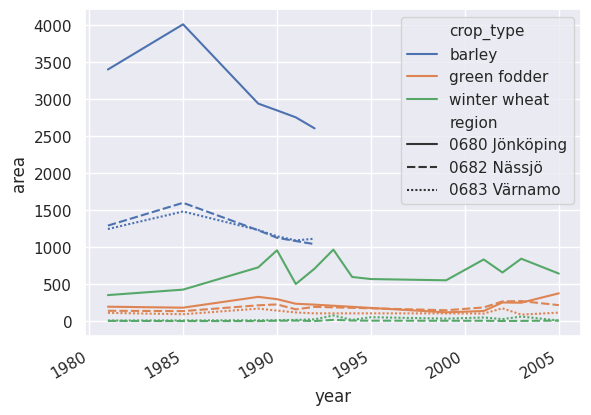

In [5]:
def plot_graph():
	g = sns.lineplot(data=df_local, x="year", y="area", hue="crop_type", style="region")
	g.figure.autofmt_xdate()

plot_graph()

Here we can see how the area of the various crops change over the years in 3 nearby cities. However, the text maybe is a bit small, and the lines are a bit thin. Let's make the graph easier to see.

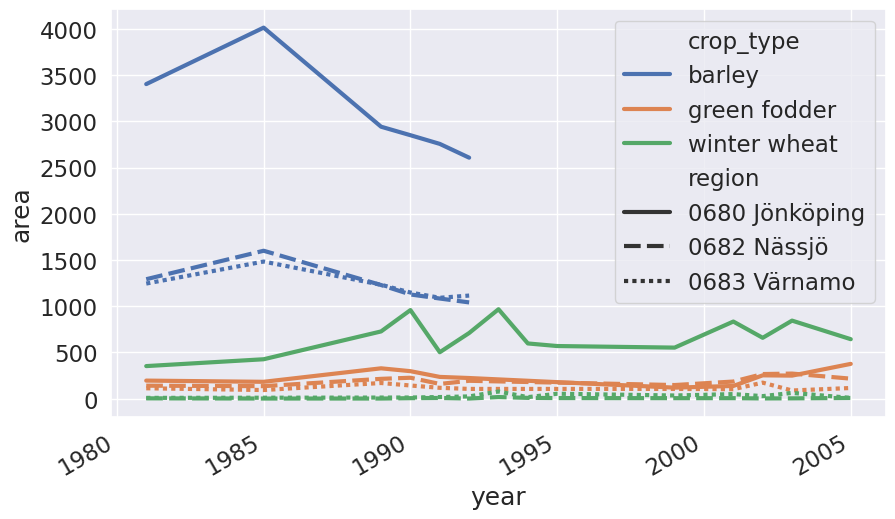

In [6]:
def plot_graph_v2():
	with sns.plotting_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3}):
		plt.figure(figsize=(10,6))
		g = sns.lineplot(data=df_local, x="year", y="area", hue="crop_type", style="region")
		g.figure.autofmt_xdate()

plot_graph_v2()

Much better! Let's also change the tick interval in the x and y axis and change the background, do an overall cleanup.

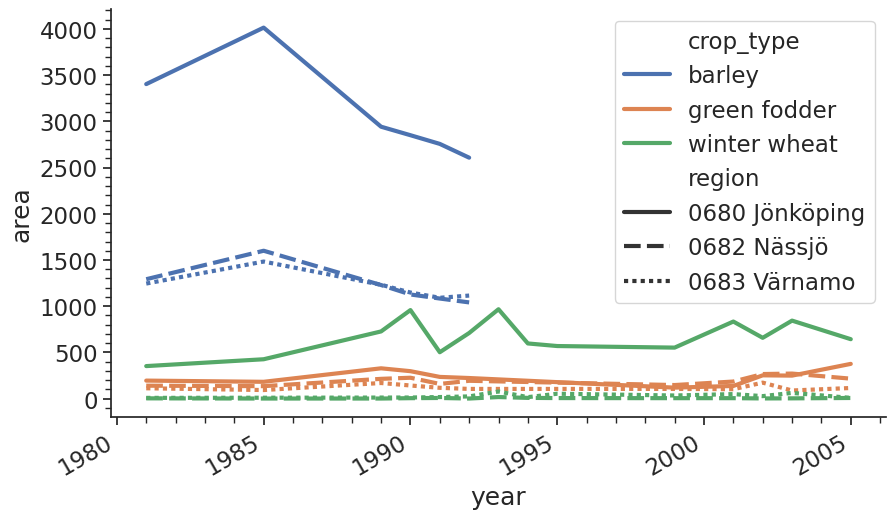

In [7]:
def plot_graph_v3():
	with sns.plotting_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3}):
		sns.set_style("ticks")
		plt.figure(figsize=(10,6))
		g = sns.lineplot(data=df_local, x="year", y="area", hue="crop_type", style="region")
		g.figure.autofmt_xdate()
		sns.despine()

		ax = g.figure.axes[0]

		ax.yaxis.set_major_locator(plt.MultipleLocator(500))
		ax.yaxis.set_minor_locator(plt.MultipleLocator(100))

		ax.xaxis.set_major_locator(plt.MultipleLocator(5))
		ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
		
plot_graph_v3()

Looking real good now, let's add a marker at each point. Also, maybe we don't want or need different styles of lines (whole, dotted, dash)? Let's disable it to see how it looks.

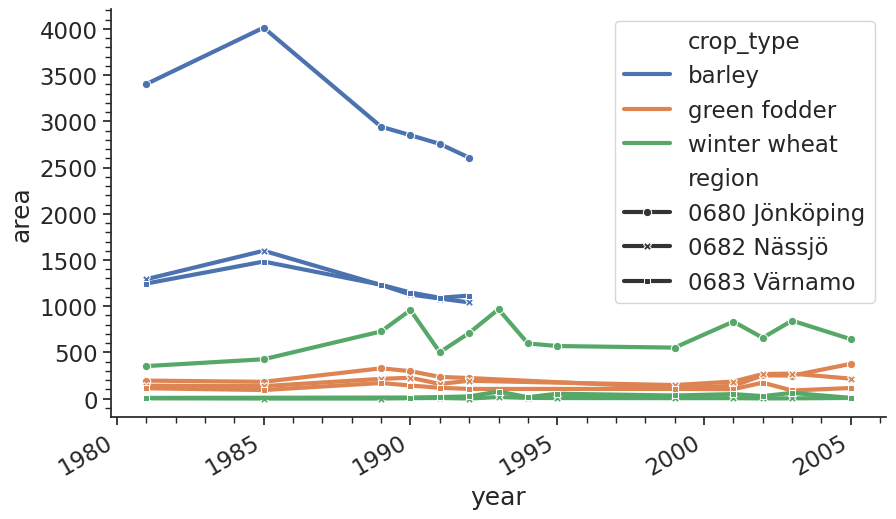

In [8]:
def plot_graph_v4():
	with sns.plotting_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3}):
		sns.set_style("ticks")
		plt.figure(figsize=(10,6))
		g = sns.lineplot(data=df_local, x="year", y="area", hue="crop_type", style="region", markers=True, dashes=False)
		g.figure.autofmt_xdate()
		sns.despine()

		ax = g.figure.axes[0]

		ax.yaxis.set_major_locator(plt.MultipleLocator(500))
		ax.yaxis.set_minor_locator(plt.MultipleLocator(100))

		ax.xaxis.set_major_locator(plt.MultipleLocator(5))
		ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
		
plot_graph_v4()

Making all lines solid, in this case, makes it worse. Much much more difficult to read which one is for which city. Let's revert that change.

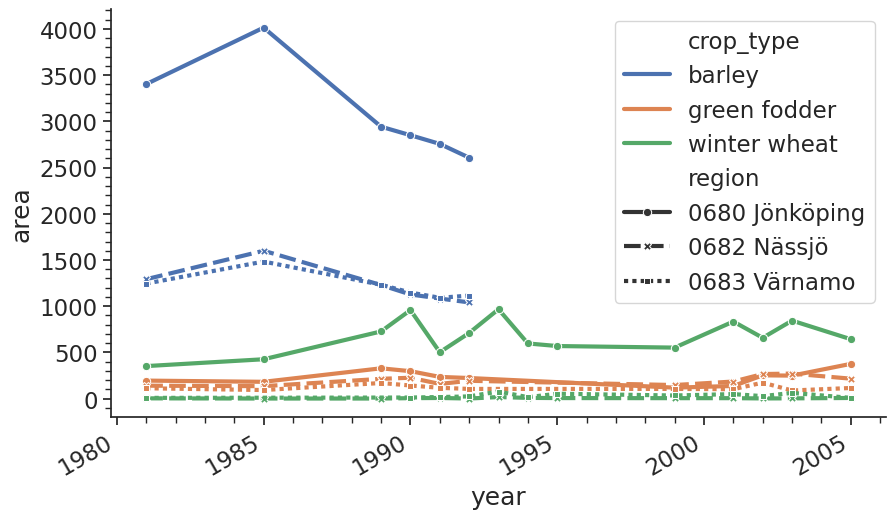

In [9]:
def plot_graph_v5():
	with sns.plotting_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3}):
		sns.set_style("ticks")
		plt.figure(figsize=(10,6))
		g = sns.lineplot(data=df_local, x="year", y="area", hue="crop_type", style="region", markers=True, dashes=True)
		g.figure.autofmt_xdate()
		sns.despine()

		ax = g.figure.axes[0]

		ax.yaxis.set_major_locator(plt.MultipleLocator(500))
		ax.yaxis.set_minor_locator(plt.MultipleLocator(100))

		ax.xaxis.set_major_locator(plt.MultipleLocator(5))
		ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
		
plot_graph_v5()

Perfection.

---

# Let's move on to scatter plots, maybe we can uncover something interesting! :)

Let's keep using the same small subset of data.

In [10]:
df_local = df_long[df_long["region"].str.contains("Jönköping|Nässjö|Värnamo")]
df_local = df_local[df_local["crop_type"].isin(["barley", "green fodder", "winter wheat", "spring barley", "winter rape"])].reset_index().drop(columns=["index"])
#df_local = df_local[df_local["area"] > 0]
df_local

,region,year,crop_type,area
0,0680 Jönköping,1981,barley,3403.0
1,0680 Jönköping,1985,barley,4014.0
2,0680 Jönköping,1989,barley,2942.0
3,0680 Jönköping,1990,barley,2850.0
4,0680 Jönköping,1991,barley,2756.0
...,...,...,...,...
205,0683 Värnamo,1999,winter wheat,34.0
206,0683 Värnamo,2001,winter wheat,49.0
207,0683 Värnamo,2002,winter wheat,27.0
208,0683 Värnamo,2003,winter wheat,62.0


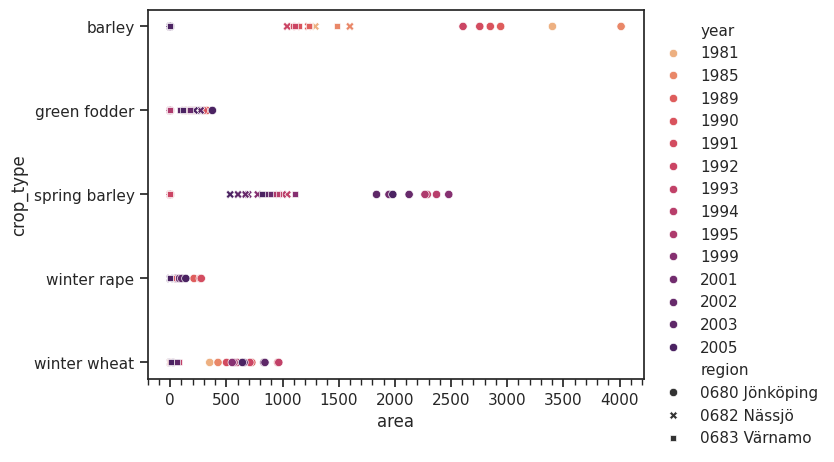

In [11]:
def plot_arable_land():
   g = sns.scatterplot(
      data=df_local,
      x="area",
      y="crop_type",
      hue="year",
      style="region",
      palette="flare",
      legend="full"
   )

   g.xaxis.set_minor_locator(plt.MultipleLocator(100))
   #g.yaxis.set_minor_locator(plt.MultipleLocator(500))

   sns.move_legend(
      g,
      "upper left",
      bbox_to_anchor=(1, 1),
      frameon=False,
   )

plot_arable_land()

It is somewhat messy with several regions mashed into 1 plot, let's seperate them.

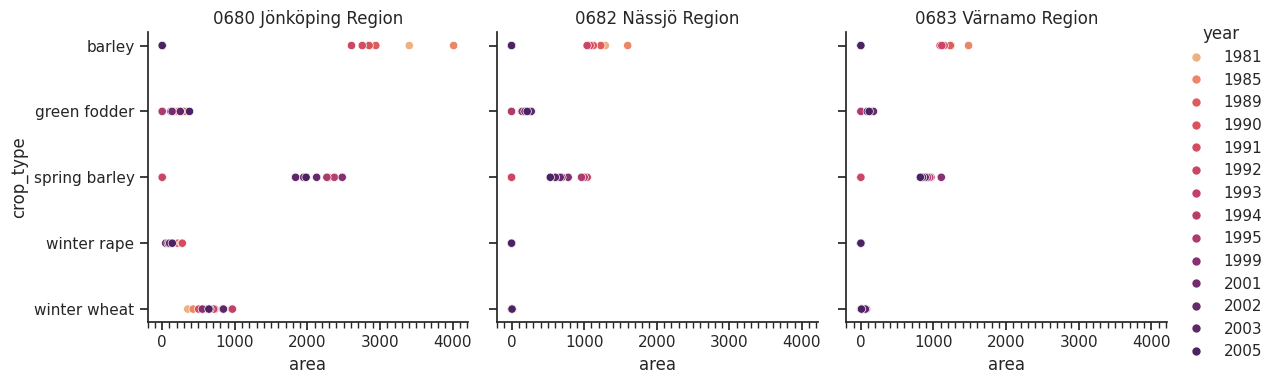

In [12]:
def plot_facet_grid():
   facet = sns.relplot(
      data=df_local,
      x="area",
      y="crop_type",
      hue="year",
      col="region",
      palette="flare",
      legend="full",
      height=4,
   )

   facet.set_titles(col_template="{col_name} Region")

   for ax in facet.axes.flat:
      ax.xaxis.set_minor_locator(plt.MultipleLocator(100))

plot_facet_grid()

Ah, way more clear now.

Let's do a strip plot to more easily see the distribution of crops per region.

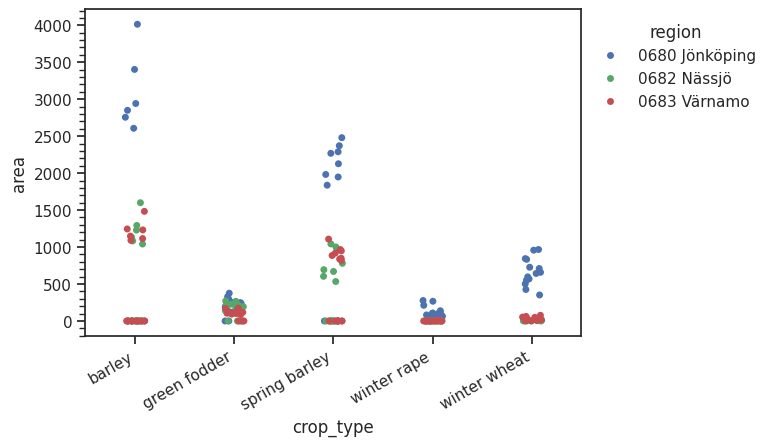

In [13]:
def plot_strip_plot():
   pal = sns.color_palette()

   g = sns.stripplot(
      data=df_local,
      x="crop_type",
      y="area",
      hue="region",
      palette={
         "0680 Jönköping": pal[0],
         "0682 Nässjö": pal[2],
         "0683 Värnamo": pal[3]
      }
   )

   g.figure.autofmt_xdate()

   g.yaxis.set_minor_locator(plt.MultipleLocator(100))

   sns.move_legend(
      g,
      "upper left",
      bbox_to_anchor=(1, 1),
      frameon=False,
   )

plot_strip_plot()

Here we see that Jönköping has by far the most land for these 3 crops. Interestingly, Nässjö and Värnamo are about equal for barley and spring barely, and neither region has much land green fodder nor winter rape.